In [1]:
import pandas as pd

In [2]:
df_train = pd.read_csv('../Datasets//Breast-Cancer/breast-cancer-train.csv')
df_test = pd.read_csv('../Datasets/Breast-Cancer/breast-cancer-test.csv')

In [3]:
df_test.head()

,Unnamed: 0,Clump Thickness,Cell Size,Type
0,158,1,2,0
1,499,1,1,0
2,396,1,1,0
3,155,5,5,1
4,321,1,1,0


In [4]:
df_test_negative = df_test.loc[ df_test['Type'] == 0][['Clump Thickness', 'Cell Size']]
df_test_positive = df_test.loc[ df_test['Type'] == 1][['Clump Thickness', 'Cell Size']]

In [5]:
df_test_negative.head()

,Clump Thickness,Cell Size
0,1,2
1,1,1
2,1,1
4,1,1
5,1,1


In [6]:
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


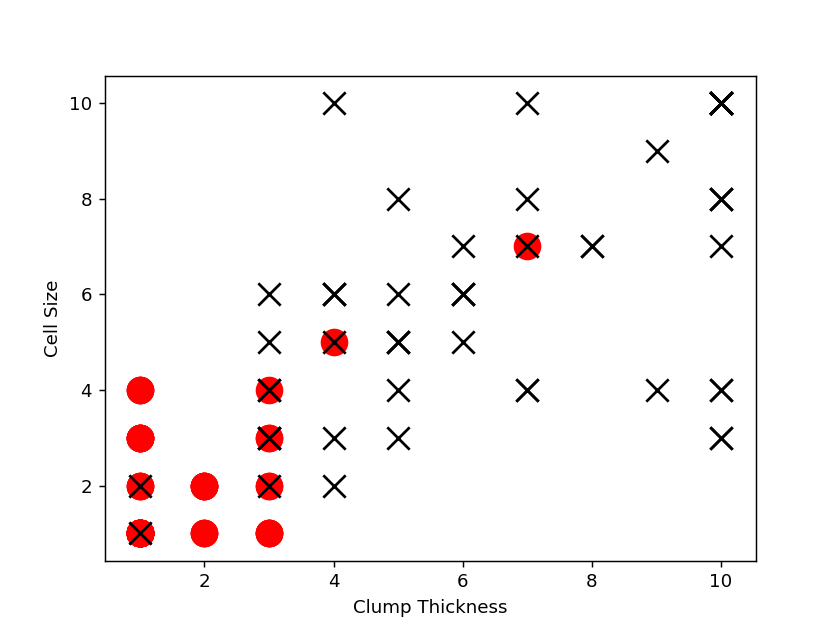

In [7]:
plt.scatter(df_test_negative['Clump Thickness'], df_test_negative['Cell Size'], 
            marker = 'o', s=200, c='red')
plt.scatter(df_test_positive['Clump Thickness'], df_test_positive['Cell Size'], 
            marker = 'x', s=150, c='black')

plt.xlabel('Clump Thickness')
plt.ylabel('Cell Size')
plt.show()

In [8]:
import numpy as np

In [9]:
intercept = np.random.random([1])
coef = np.random.random([2])

lx = np.arange(0, 12)
ly = (-intercept - lx * coef[0]) / coef[1]

<IPython.core.display.Javascript object>


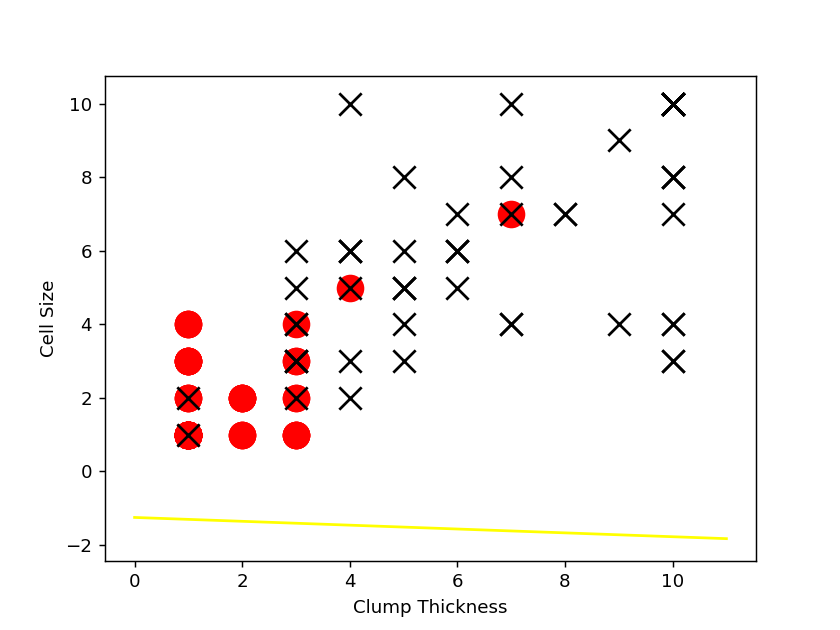

In [10]:
plt.plot(lx, ly, c='yellow')
plt.scatter(df_test_negative['Clump Thickness'], df_test_negative['Cell Size'],
            marker = 'o', s=200, c='red')
plt.scatter(df_test_positive['Clump Thickness'], df_test_positive['Cell Size'],
            marker = 'x', s=150, c='black')

plt.xlabel('Clump Thickness')
plt.ylabel('Cell Size')
plt.show()

In [11]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [12]:
df_train.head()

,Unnamed: 0,Clump Thickness,Cell Size,Type
0,163,1,1,0
1,286,10,10,1
2,612,10,10,1
3,517,1,1,0
4,464,1,1,0


In [13]:
lr.fit(df_train[['Clump Thickness', 'Cell Size']][:10], df_train['Type'][:10])
print('测试精度 (10个训练样本):', 
      lr.score(df_test[['Clump Thickness', 'Cell Size']], df_test['Type']))

测试精度 (10个训练样本): 0.8342857142857143


In [22]:
lr.coef_[0, :]

array([0.4915441 , 0.53242585])

<IPython.core.display.Javascript object>


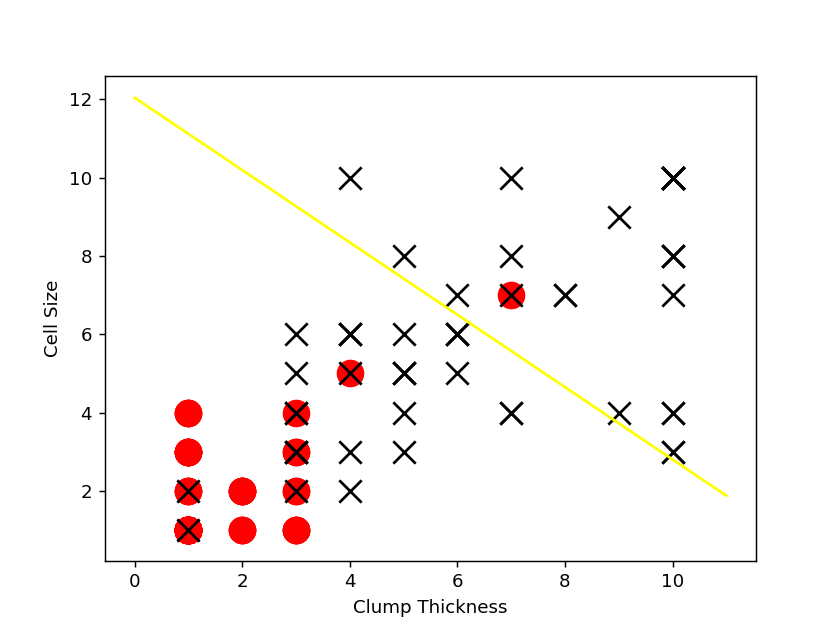

In [14]:
intercept = lr.intercept_
coef = lr.coef_[0, :]
ly = (-intercept - lx * coef[0]) / coef[1]

plt.plot(lx, ly, c='yellow')
plt.scatter(df_test_negative['Clump Thickness'],df_test_negative['Cell Size'],
            marker = 'o', s=200, c='red')
plt.scatter(df_test_positive['Clump Thickness'],df_test_positive['Cell Size'],
            marker = 'x', s=150, c='black')
plt.xlabel('Clump Thickness')
plt.ylabel('Cell Size')
plt.show()